In [14]:
import sys
!{sys.executable} -m pip install scikit-surprise
import pandas as pd
import numpy as np
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from matplotlib import pyplot as plt
from surprise import SVD, KNNBasic
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate

mv_rating_data = pd.read_csv('/Users/maniroop/Downloads/ratings_small.csv', delimiter = ',')
mv_rating_data.info()
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(mv_rating_data[['userId', 'movieId', 'timestamp']], reader)
pmf_values = SVD(biased=True)
ubcf_values = KNNBasic(sim_options={'user_based': True})
ibcf_values = KNNBasic(sim_options={'user_based': False})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [15]:
pmf_outcome = cross_validate(pmf_values, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
pmf_outcome_df = pd.DataFrame.from_dict(pmf_outcome)
ubcf_outcome = cross_validate(ubcf_values, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
ubcf_outcome_df = pd.DataFrame.from_dict(ubcf_outcome)
ibcf_outcome = cross_validate(ibcf_values, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
ibcf_outcome_df = pd.DataFrame.from_dict(ibcf_outcome)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     1128996149.34571130863311.06281128543922.10571128409548.54641131382565.80541129639099.37321237979.2148
RMSE (testset)    1145293031.78711147039629.79821144642678.00961144525431.25171147430409.20651145786236.01061217777.1087
Fit time          0.43    0.43    0.43    0.43    0.42    0.43    0.00    
Test time         0.07    0.07    0.07    0.07    0.07    0.07    0.00    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 

In [16]:
pmf_mae_values = pmf_outcome_df['test_mae'].mean()
pmf_rmse_values = pmf_outcome_df['test_rmse'].mean()
ubcf_mae_values = ubcf_outcome_df['test_mae'].mean()
ubcf_rmse_values = ubcf_outcome_df['test_rmse'].mean()
ibcf_mae_values = ibcf_outcome_df['test_mae'].mean()
ibcf_rmse_values = ibcf_outcome_df['test_rmse'].mean()

In [17]:
print('Average MAE for PMF:', pmf_mae_values)
print('Average RMSE for PMF:', pmf_rmse_values)
print('Average MAE for UBCF:', ubcf_mae_values)
print('Average RMSE for UBCF:', ubcf_rmse_values)
print('Average MAE for IBCF:', ibcf_mae_values)
print('Average RMSE for IBCF:', ibcf_rmse_values)

Average MAE for PMF: 1129639099.3732095
Average RMSE for PMF: 1145786236.0106256
Average MAE for UBCF: 1129639072.5313148
Average RMSE for UBCF: 1145786601.4139977
Average MAE for IBCF: 1129639078.78686
Average RMSE for IBCF: 1145785643.8834586


In [18]:
models = {'User-based CF (cosine)': KNNBasic(sim_options={'name': 'cosine', 'user_based': True}),
          'User-based CF (MSD)': KNNBasic(sim_options={'name': 'msd', 'user_based': True}),
          'User-based CF (Pearson)': KNNBasic(sim_options={'name': 'pearson', 'user_based': True}),
          'Item-based CF (cosine)': KNNBasic(sim_options={'name': 'cosine', 'user_based': False}),
          'Item-based CF (MSD)': KNNBasic(sim_options={'name': 'msd', 'user_based': False}),
          'Item-based CF (Pearson)': KNNBasic(sim_options={'name': 'pearson', 'user_based': False})}
rmse_results = {}
mae_results = {}
for model_name, model in models.items():
    sim_metric = model_name.split('(')[-1][:-1]
    print('Model:', model_name)
    model_results = cross_validate(model, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    rmse_results[(sim_metric, model_name.split('(')[0])] = sum(model_results['test_rmse']) / 5
    mae_results[(sim_metric, model_name.split('(')[0])] = sum(model_results['test_mae']) / 5

Model: User-based CF (cosine)
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     1129663718.22801128749920.63121130915880.10311130605860.29511128259961.48621129639068.14871025481.5398
RMSE (testset)    1145791450.31431144905908.80531147039592.36241146736882.02211144458245.99191145786415.89921001318.1801
Fit time          0.06    0.07    0.07    0.07    0.07    0.07    0.00    
Test time         0.79    0.88    0.80    0.88    0.80    0.83    0.04    
Model: User-based CF (MSD)
Computing the msd similarity matrix..

In [19]:
rmse_results

{('cosine', 'User-based CF '): 1145786415.8991935,
 ('MSD', 'User-based CF '): 1145785272.428391,
 ('Pearson', 'User-based CF '): 1145786654.1269011,
 ('cosine', 'Item-based CF '): 1145786363.0509892,
 ('MSD', 'Item-based CF '): 1145785828.756878,
 ('Pearson', 'Item-based CF '): 1145785179.7670522}

In [20]:
mae_results

{('cosine', 'User-based CF '): 1129639068.1487272,
 ('MSD', 'User-based CF '): 1129639105.8945763,
 ('Pearson', 'User-based CF '): 1129639074.0832498,
 ('cosine', 'Item-based CF '): 1129639090.5757277,
 ('MSD', 'Item-based CF '): 1129639072.3265815,
 ('Pearson', 'Item-based CF '): 1129639079.96394}

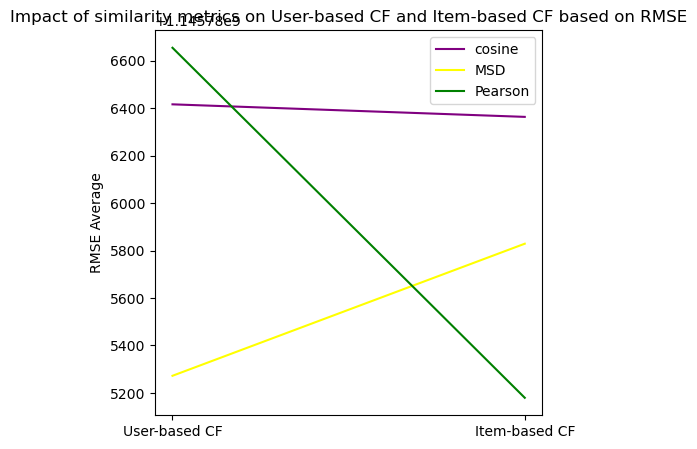

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
for i, sim_metric in enumerate(['cosine', 'MSD', 'Pearson']):
    color = ['purple', 'yellow', 'green'][i]
    ax.plot([rmse_results[(sim_metric, 'User-based CF ')], rmse_results[(sim_metric, 'Item-based CF ')]],
            label=sim_metric, color=color)
ax.set_xticks([0, 1])
ax.set_xticklabels(['User-based CF', 'Item-based CF'])
ax.set_ylabel('RMSE Average')
ax.set_title('Impact of similarity metrics on User-based CF and Item-based CF based on RMSE')
ax.legend()
plt.show()

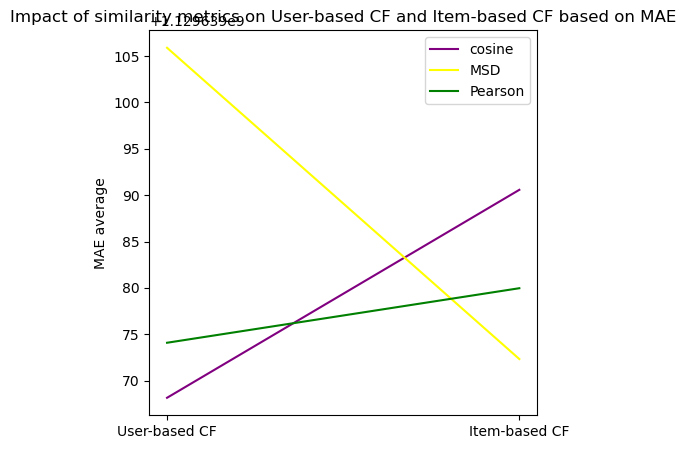

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
colors = ['purple', 'yellow', 'green']  
for i, sim_metric in enumerate(['cosine', 'MSD', 'Pearson']):
    ax.plot([mae_results[(sim_metric, 'User-based CF ')], mae_results[(sim_metric, 'Item-based CF ')]],
            label=sim_metric, color=colors[i])
ax.set_xticks([0, 1])
ax.set_xticklabels(['User-based CF', 'Item-based CF'])
ax.set_ylabel('MAE average')
ax.set_title('Impact of similarity metrics on User-based CF and Item-based CF based on MAE')
ax.legend()
plt.show()

In [23]:
sim_options = {'user_based': True}
rmse_results_ub = []
for k in range(1, 100):
    algo = KNNBasic(k=k, sim_options=sim_options)
    cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_results_ub.append(cv_results['test_rmse'].mean())


sim_options = {'user_based': False}
rmse_results_ib = []
for k in range(1, 100):
    algo = KNNBasic(k=k, sim_options=sim_options)
    cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_results_ib.append(cv_results['test_rmse'].mean())



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

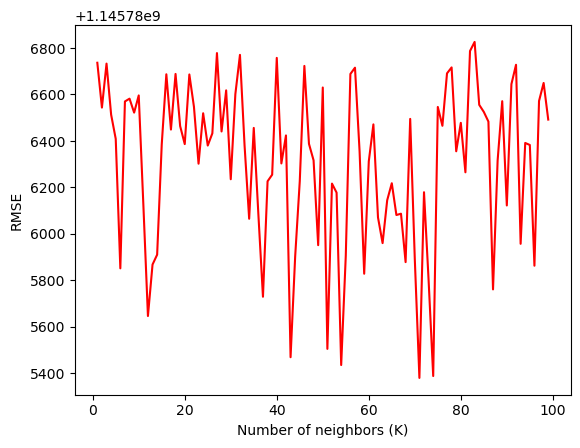

In [24]:
plt.plot(range(1, 100), rmse_results_ub, color='red')
plt.xlabel('Number of neighbors (K)')
plt.ylabel('RMSE')
plt.show()

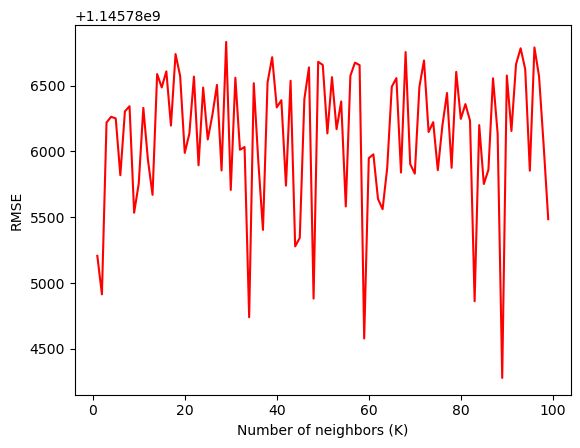

In [25]:
plt.plot(range(1, 100), rmse_results_ib, color='red')
plt.xlabel('Number of neighbors (K)')
plt.ylabel('RMSE')
plt.show()

In [26]:
best_k = rmse_results_ib.index(min(rmse_results_ib)) + 1
print('Best K for item-based CF:', best_k)
print ('Best k for User-based CF:', rmse_results_ub.index(min(rmse_results_ub)) + 1 )

Best K for item-based CF: 89
Best k for User-based CF: 71
